# 1. Importing Packages

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from seaborn import countplot
from sklearn import preprocessing, metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# 2. Importing Dataset

In [2]:
df = pd.read_csv(r"D:\nikoo\Dataset\heart_disease.csv")

In [3]:
df.dtypes

gender              object
age                  int64
education          float64
currentSmoker        int64
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
TenYearCHD           int64
dtype: object

In [4]:
len(df)

4238

In [5]:
df.head()

,gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,male,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,female,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,male,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,female,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,female,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


# 3. Cleaning & Preprocessing

## 3.1. Label Encoding 

In [6]:
le_gender = preprocessing.LabelEncoder().fit(["female","male"])
df["gender"] = le_gender.fit_transform(df["gender"])
df1=df.copy()

In [7]:
df.head()

,gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


## 3.2. Detecting NaN Values

In [8]:
print(df1.isnull().sum())
print('****************')
print(df1.isnull().sum().sum())

gender               0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64
****************
645


# 3.3. Dropping Useless Features

In [9]:
df2=df1.copy()

In [10]:
df2.drop('glucose', axis= 'columns', inplace = True)

In [11]:
df2.drop('education', axis= 'columns', inplace = True)

In [12]:
df2.head()

,gender,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,0


In [13]:
df2.dropna(inplace=True)

In [14]:
print(df2.isnull().sum())
print('****************')
print(df2.isnull().sum().sum())

gender             0
age                0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
TenYearCHD         0
dtype: int64
****************
0


## 3.4. Removing Useless Values

# 4. Plotting

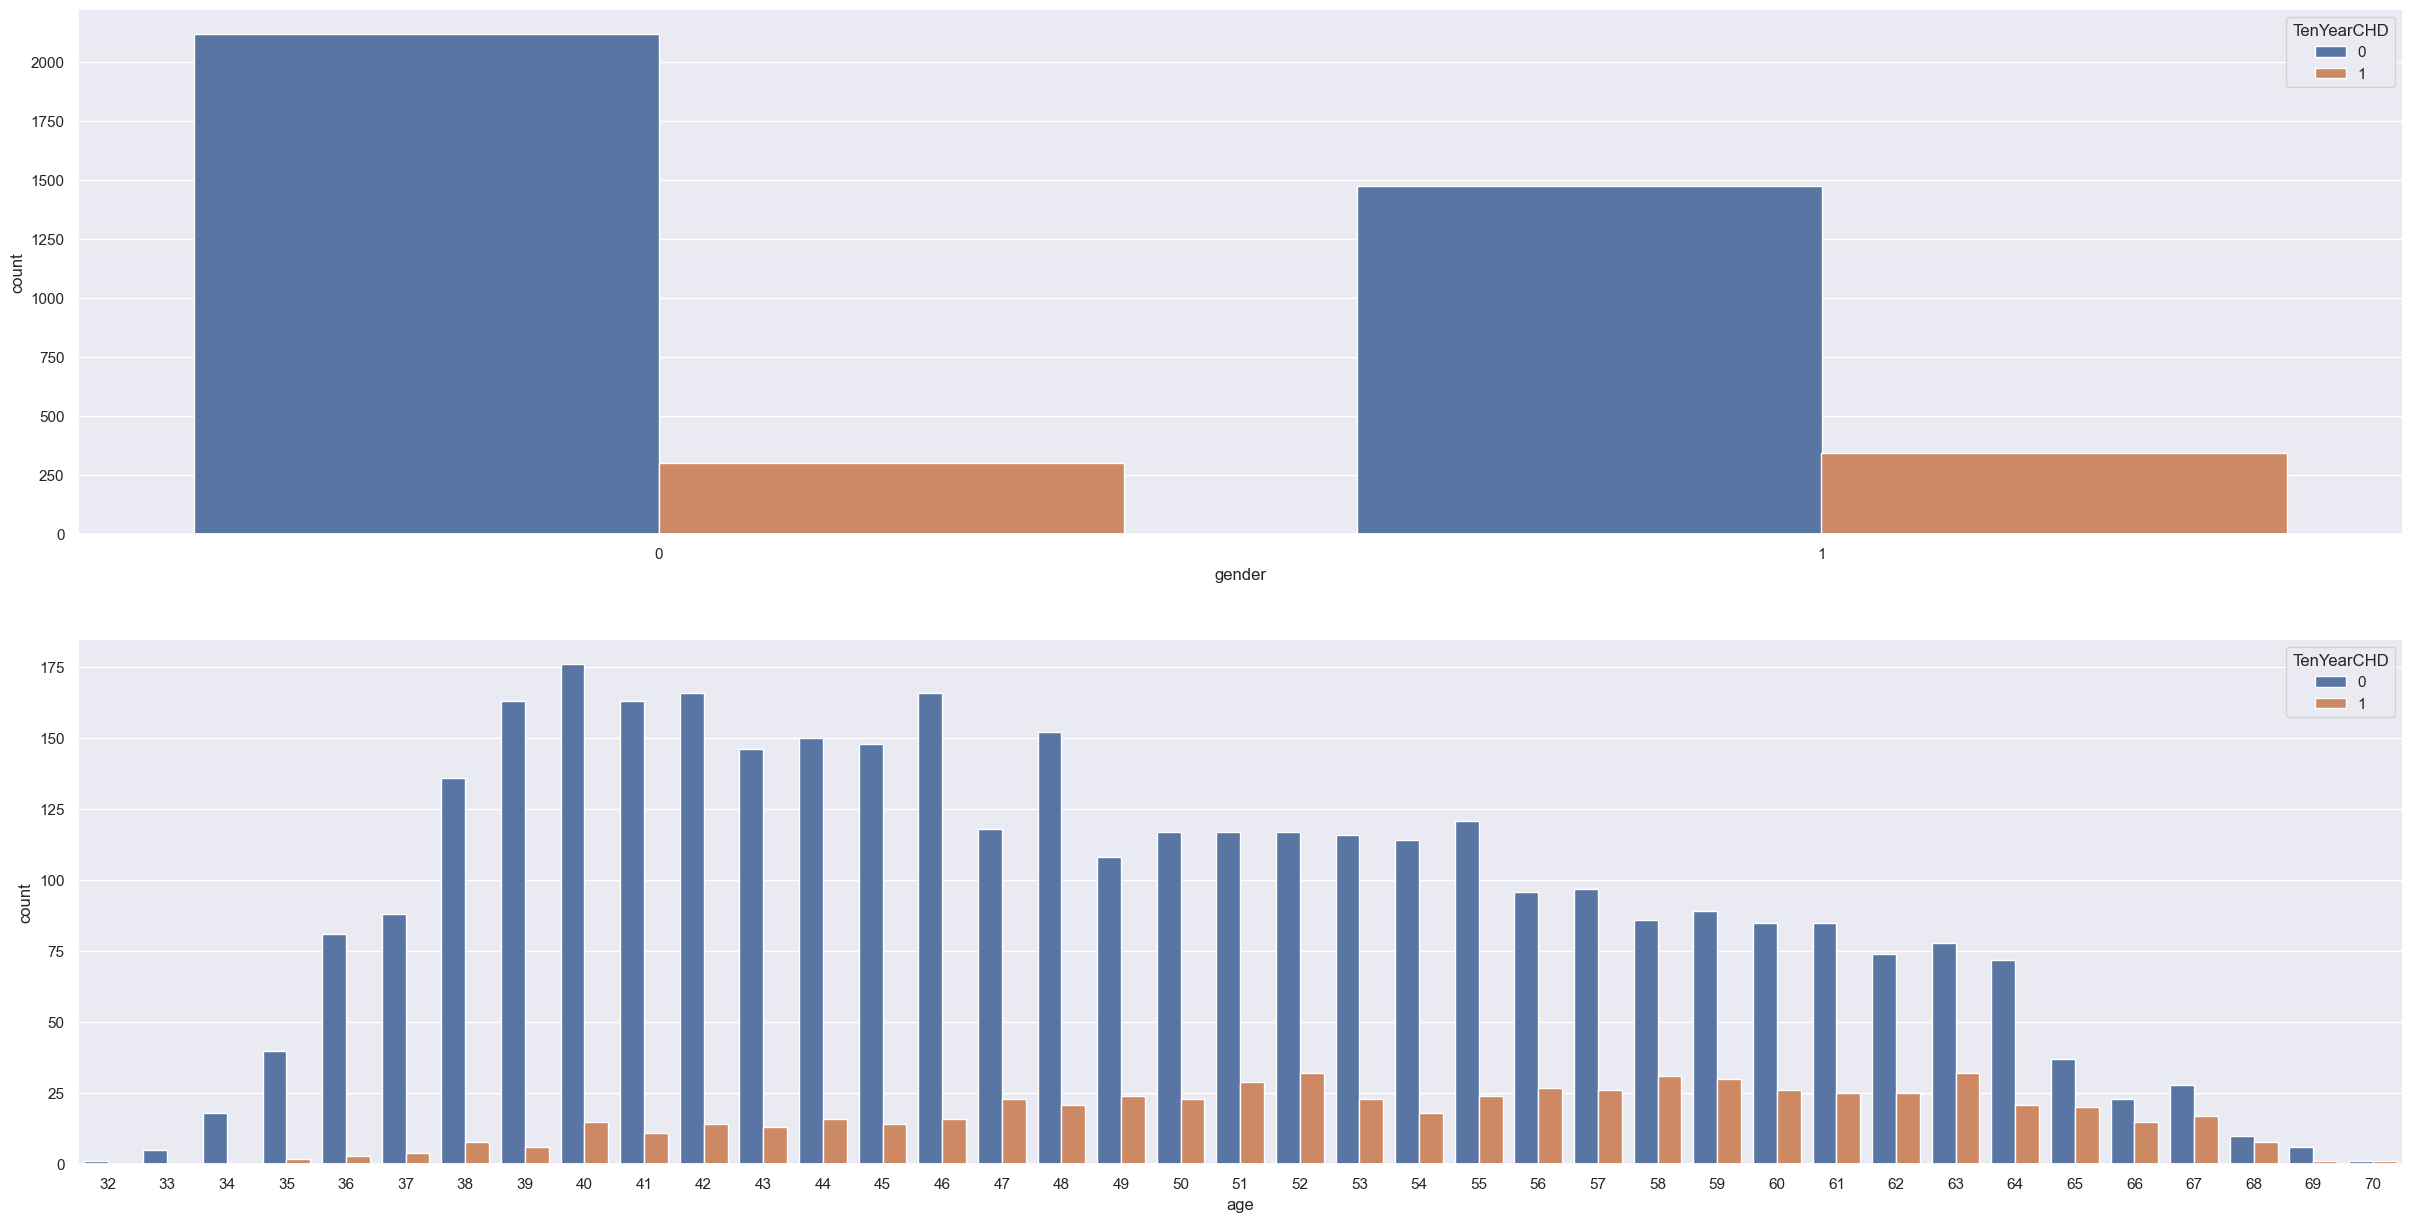

In [16]:
fig, ax = plt.subplots(2)
sns.countplot(x='gender',hue='TenYearCHD',data=df, ax=ax[0])
sns.countplot(x='age',hue='TenYearCHD',data=df, ax=ax[1])
sns.set(rc={'figure.figsize':(30,15)})

# 5. Define X(features) & y(label)

In [17]:
X = df2[["gender","age","currentSmoker","cigsPerDay","BPMeds","prevalentStroke","prevalentHyp","diabetes","totChol","sysBP","diaBP","BMI","heartRate"]]
y = df2[["TenYearCHD"]]

# 6. Normalize Dataset

In [18]:
scaler = preprocessing.StandardScaler().fit(X)
X = scaler.fit_transform(X)

In [19]:
X.mean()

-3.476236476321429e-18

In [20]:
X.std()

1.0

# 7. Train Test Split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# 8. Modelling

In [22]:
LR = LogisticRegression().fit(X_train, y_train.values.ravel())

# 9. Predicting

In [23]:
y_pred = LR.predict(X_test)

# 10. Confusion Matrix

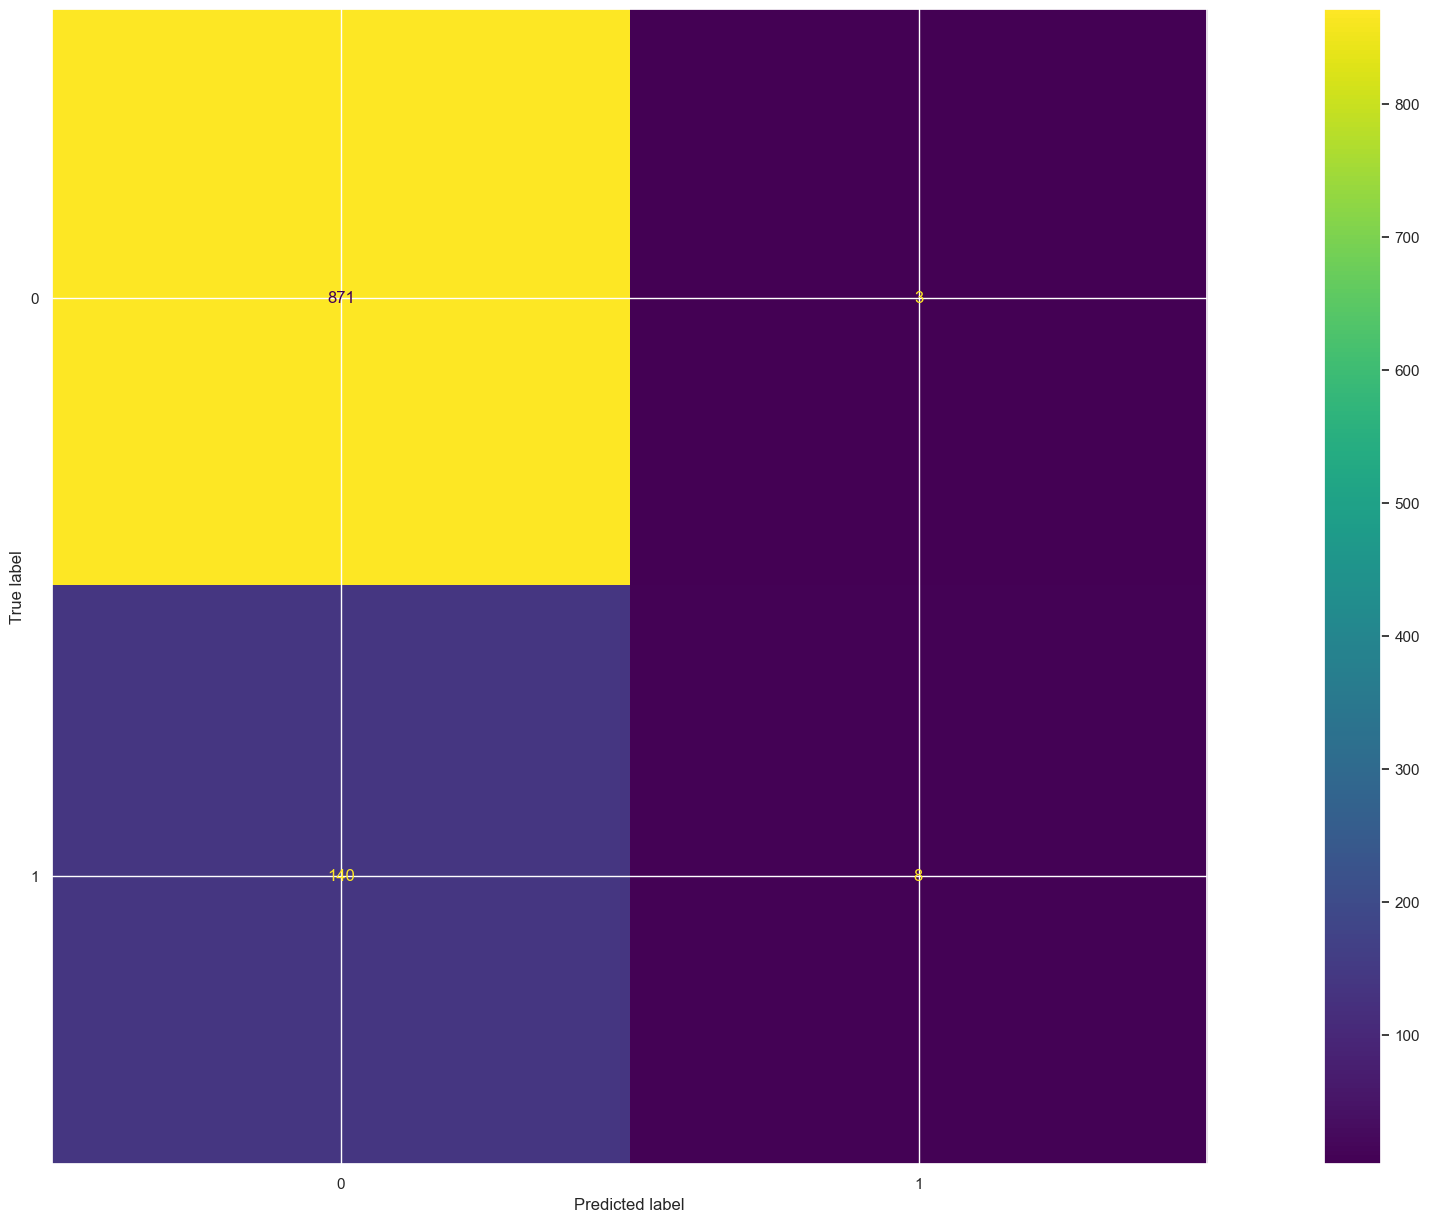

In [24]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])
cm_display.plot()

# 11. Check Accuracy

In [25]:
accuracy_score(y_test, y_pred)

0.860078277886497